In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("Sample - Superstore.csv", encoding="cp1252")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
data.set_index("Row ID", inplace=True)

In [5]:
data.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
data.shape

(9994, 20)

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

In [9]:
data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
data.duplicated().sum()

1

In [11]:
data.drop_duplicates()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


### **Which products are the most profitable for the company?**
This is done by identifying high margin products and those with low or negative profit margins

In [12]:
Product_Profit = data.groupby("Product Name")["Profit"].sum().reset_index()
Low_Profit_margin = Product_Profit.sort_values(by="Profit", ascending=True) 
Low_Profit_margin.head(5)

,Product Name,Profit
475,Cubify CubeX 3D Printer Double Head Print,-8879.9704
985,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
476,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.1156
376,Bush Advantage Collection Racetrack Conference...,-1934.3976


In [13]:
High_Profit_margin = Product_Profit.sort_values(by="Profit", ascending=False)
High_Profit_margin.head(5)

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766


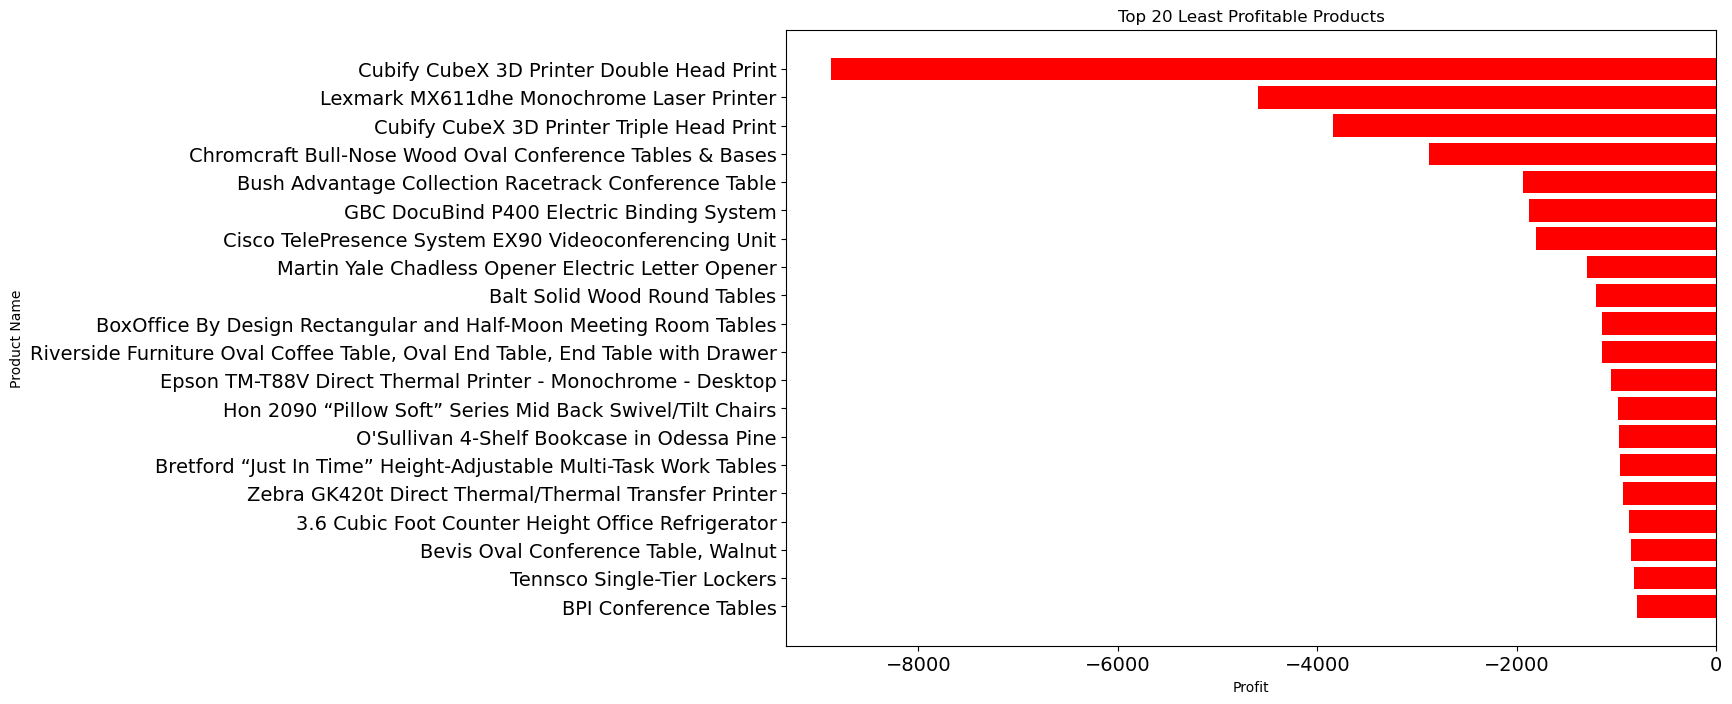

In [14]:
Least_Profitable = Low_Profit_margin.head(20)
plt.figure(figsize=(12,8))
plt.barh(Least_Profitable["Product Name"], Least_Profitable["Profit"], color="red")
plt.xlabel("Profit")
plt.ylabel("Product Name")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Top 20 Least Profitable Products")
plt.gca().invert_yaxis()
plt.show()

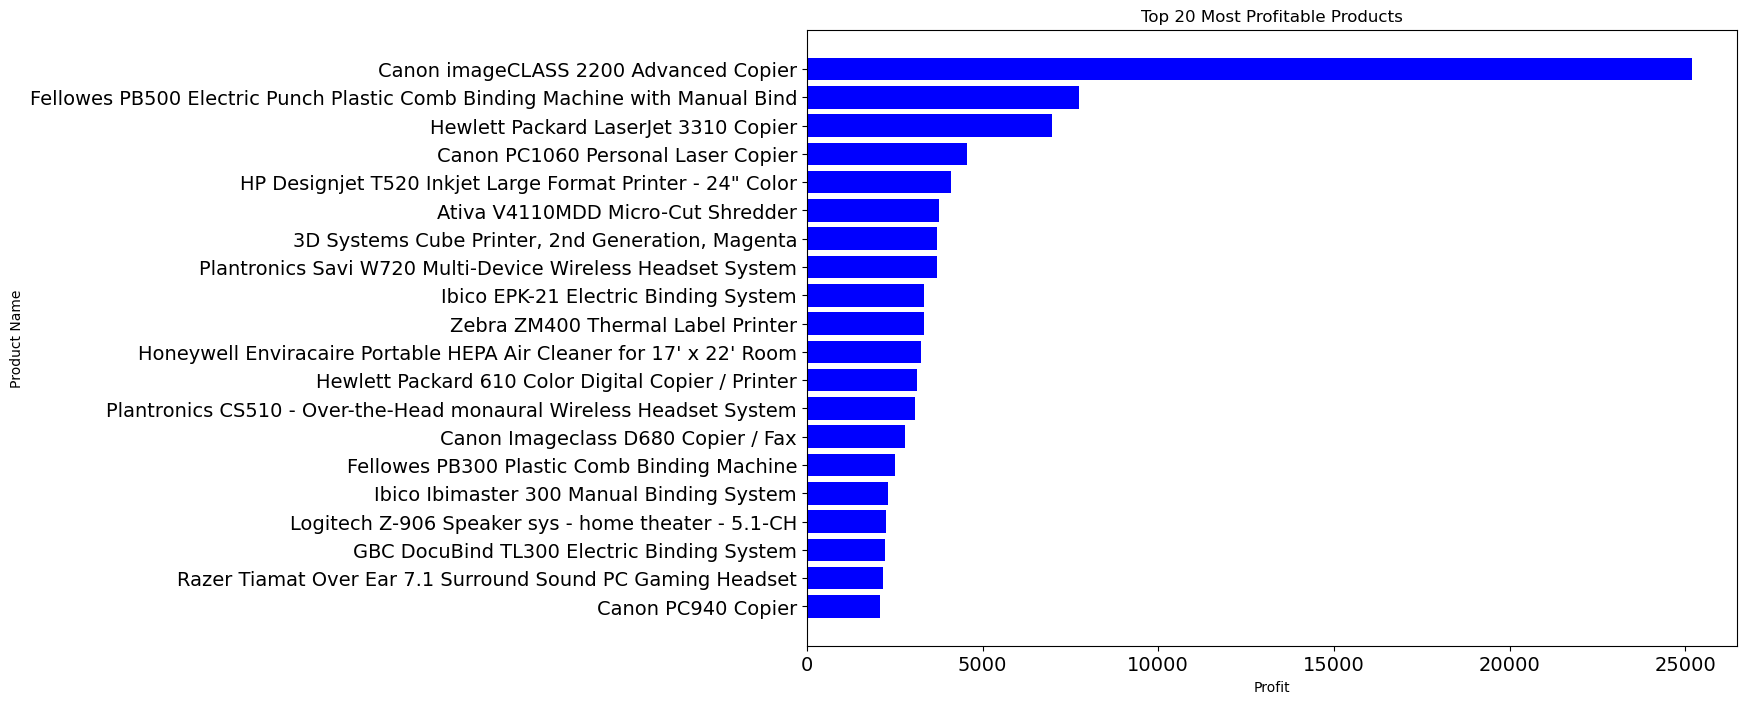

In [15]:
Most_Profitable = High_Profit_margin.head(20)
plt.figure(figsize=(12,8))
plt.barh(Most_Profitable["Product Name"], Most_Profitable["Profit"], color="blue")
plt.xlabel("Profit")
plt.ylabel("Product Name")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Top 20 Most Profitable Products")
plt.gca().invert_yaxis()
plt.show()

From the above analysis, it shows that the 
- Cubify CubeX 3D Printer double head print, 
- Lexmark MX611dhe 
- Monochrome Laser Printer, 
- Cubify CubeX 3D Printer Triple Head Print, 
- ChromeCraft Bull-Nose wood oval conference Tables and Bases are the Least Profitable Products.

The Most Profitable products can be seen to be the 
- Canon imageCLASS 2200 Advanced Copier, 
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine and Manual Bind, 
- Hewlet Packard Laserjet 3310 Copier

### **Which regions generate the highest and lowest sales and profits?** 
Pin point regional performance to target successful areas and address underperfing ones.

In [16]:
Region_data = data.groupby("Region")[["Sales", "Profit"]].sum().reset_index()
High_sales = Region_data.sort_values(by="Sales", ascending=False)
High_Profit = Region_data.sort_values(by="Profit", ascending=False)

In [17]:
Highest_sales = High_sales.head(10)
Highest_Profit = High_Profit.head(10)

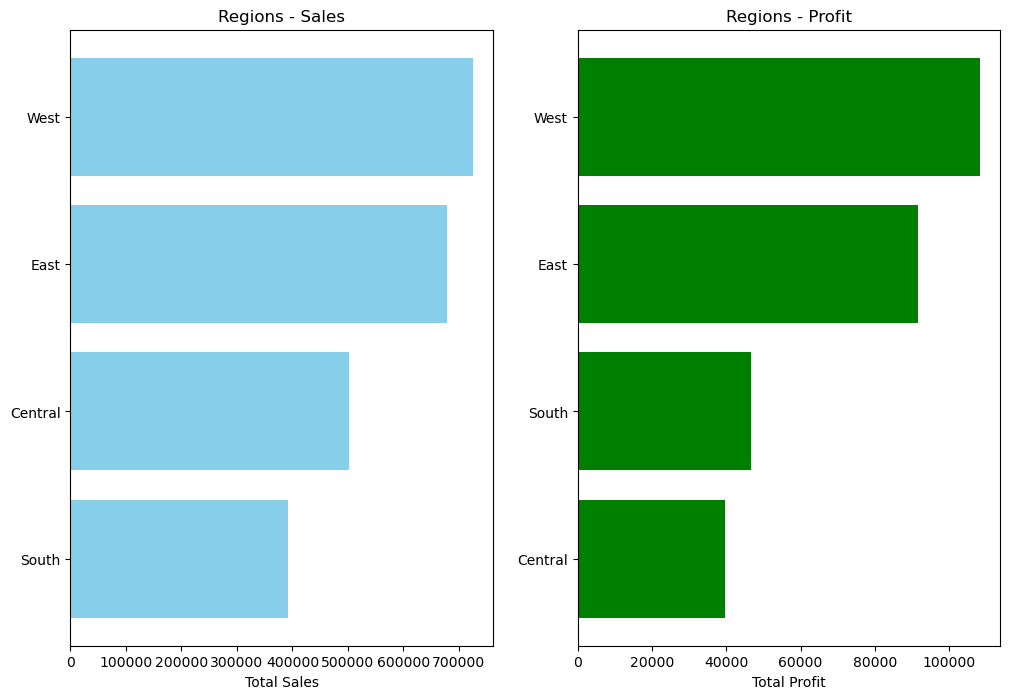

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))
axes[0].barh(Highest_sales["Region"], Highest_sales["Sales"], color="skyblue")
axes[0].set_title("Regions - Sales")
axes[0].set_xlabel("Total Sales")
axes[0].invert_yaxis() 
axes[1].barh(Highest_Profit["Region"], Highest_Profit["Profit"], color="green")
axes[1].set_title("Regions - Profit") 
axes[1].set_xlabel("Total Profit")
axes[1].invert_yaxis() 

From the analysis, it can be seen that the regions with High sales and profita are the West and East regions.

as well as the regions with low sales and profits are the Central and South regions. However, the Central region

generates more sales than the south region but with a lesser profit.

### **Which Product Categories and SubCategories contribute most to overall sales and profit?** 

Highlight top performing categories to prioritize them and identify categories with losses for improvements.

In [19]:
Categories = data.groupby(["Category", "Sub-Category"])[["Sales", "Profit"]].sum().reset_index() 
Top_Categories = Categories.groupby("Category")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False).reset_index()
Top_Subcategories = Categories.sort_values(by="Sales", ascending=False)
print(Top_Categories)
Top_Subcategories.head(5)

          Category        Sales       Profit
0       Technology  836154.0330  145454.9481
1        Furniture  741999.7953   18451.2728
2  Office Supplies  719047.0320  122490.8008


,Category,Sub-Category,Sales,Profit
16,Technology,Phones,330007.054,44515.7306
1,Furniture,Chairs,328449.103,26590.1663
11,Office Supplies,Storage,223843.608,21278.8264
3,Furniture,Tables,206965.532,-17725.4811
6,Office Supplies,Binders,203412.733,30221.7633


In [20]:
!pip install squarify

In [21]:
import squarify

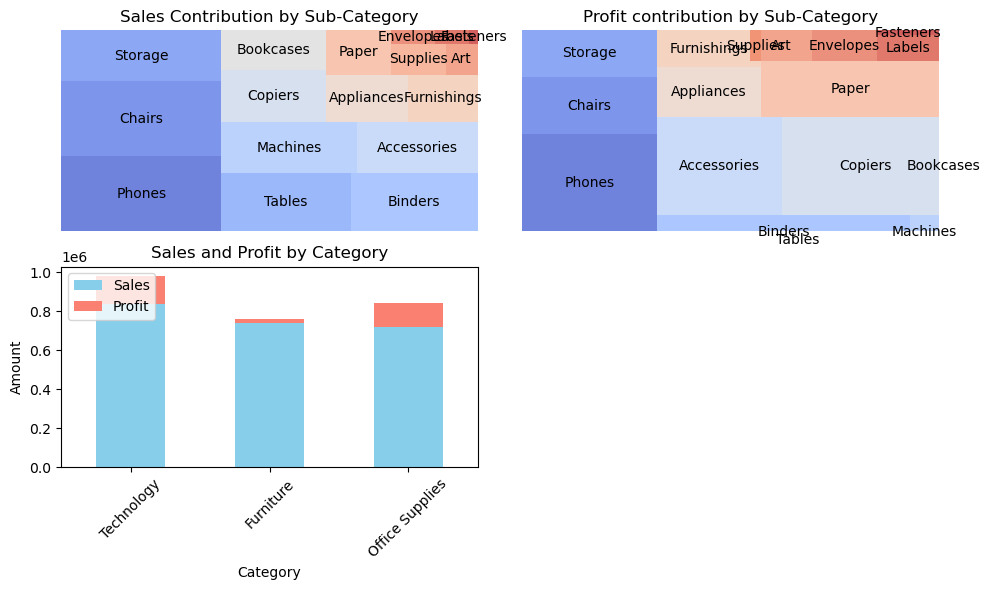

In [22]:
fig, axes = plt.subplots(2,2, figsize=(20, 16))
squarify.plot(
    sizes = Top_Subcategories["Sales"],
    label = Top_Subcategories["Sub-Category"],
    color = sns.color_palette("coolwarm", len(Top_Subcategories)), alpha=0.8, ax=axes[0, 0])
axes[0, 0].set_title("Sales Contribution by Sub-Category")
axes[0, 0].axis("off")

squarify.plot(
    sizes = Top_Subcategories["Profit"], 
    label = Top_Subcategories["Sub-Category"],
    color=sns.color_palette("coolwarm", len(Top_Subcategories)), alpha=0.8, ax=axes[0, 1]) 
axes[0, 1].set_title("Profit contribution by Sub-Category") 
axes[0, 1].axis("off")

Categories_Bar = Top_Categories.set_index("Category") 
Categories_Bar.plot(kind="bar", stacked=True, figsize=(10, 6), color=["skyblue", "salmon"], ax=axes[1, 0])
axes[1, 0].set_title("Sales and Profit by Category")
axes[1, 0].set_ylabel("Amount")
axes[1, 0].set_xlabel("Category")
axes[1, 0].legend(["Sales", "Profit"], loc="upper left")
axes[1, 0].tick_params(axis="x", rotation=45) 

axes[1, 1].axis("off") 
plt.tight_layout()
plt.show()

A stacked bar chart shows overall sales and profit for each category while the Treemap provides a detailed view

of how each sub-category contributes to the total sales and profit.

This approach provides a comprehensive view of categories and sub-categories in a single layout.

### **Which are the most profitable customer segments and which segments should the company avoid or reassess?**

Classify customers based on profitability, helping focus effect on high value segments.

In [23]:
Customer_segments = data.groupby("Segment")[["Sales", "Profit"]].sum().reset_index()
Segments_sorted = Customer_segments.sort_values(by="Profit", ascending=False)
Segments_Avoid = Customer_segments[Customer_segments["Profit"] <=0]

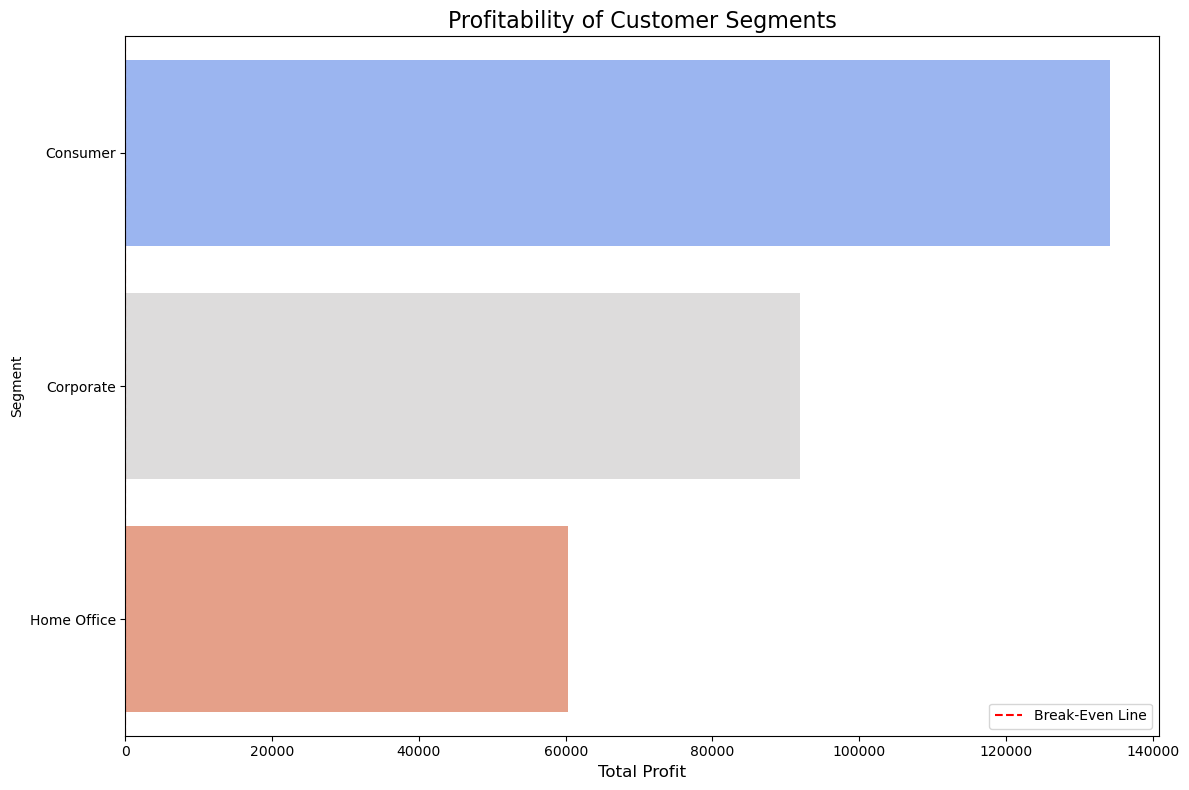

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Profit", y="Segment", data=Segments_sorted, palette="coolwarm")
plt.title("Profitability of Customer Segments", fontsize=16)
plt.xlabel("Total Profit", fontsize=12)
plt.axvline(0, color="red", linestyle="--", label="Break-Even Line")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
print("Segments to avoid or reassess (negative/low profit):") 
print(Segments_Avoid)

Segments to avoid or reassess (negative/low profit):
Empty DataFrame
Columns: [Segment, Sales, Profit]
Index: []


The consumer segment is the most profitable segment, leverage on this segment by offering tailored products, promotions and better customer engagement to further boost profits.

Explore strategies to enhance relatioships with corporate customers e.g offering bulk discounts or customized
services.

Reassess the home office segment by investigating why the segment is underperforming. Consider adjusting marketing strategies, pricing or product offerings.

### **What are the trends in sales and profits over time, are there any seasonal patterns?**
This is achieved by understanding the sales perfromance throughout the year to optimize inventory and marketing 
campaigns.

In [26]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [27]:
data["Year"] = data["Order Date"].dt.year
data["Month"] = data["Order Date"].dt.month
data["Month_Name"] = data["Order Date"].dt.month_name()

In [28]:
Sales_trends = data.groupby(["Year", "Month"])[["Sales", "Profit"]].sum().reset_index()

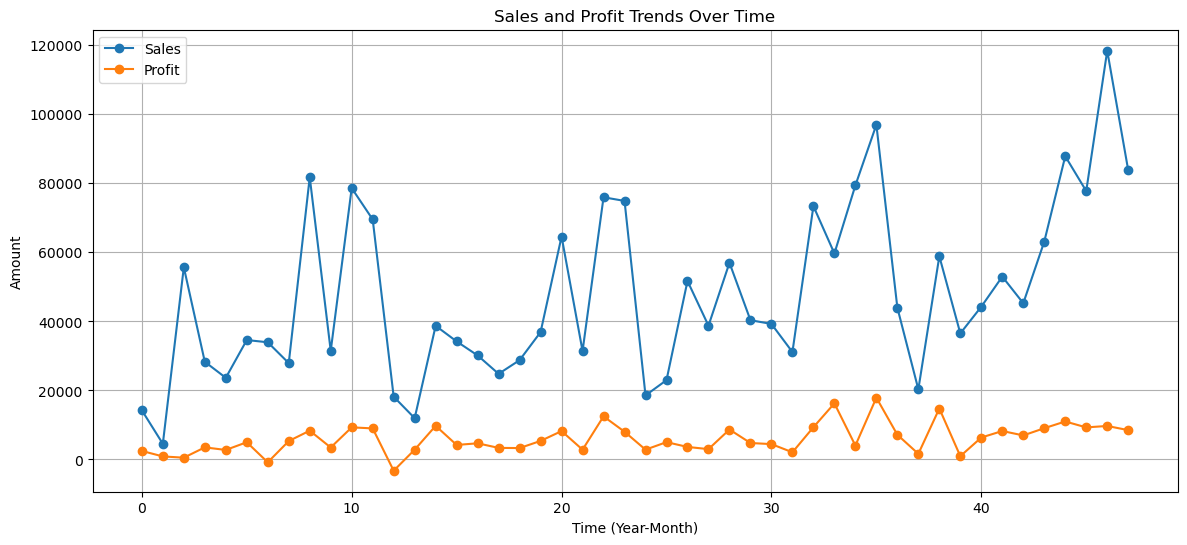

In [29]:
plt.figure(figsize=(14, 6))
plt.plot(Sales_trends["Sales"], marker="o", label="Sales")
plt.plot(Sales_trends["Profit"], marker="o", label="Profit")
plt.title("Sales and Profit Trends Over Time") 
plt.xlabel("Time (Year-Month)")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
Seasonal_trends = data.groupby("Month_Name")[["Sales", "Profit"]].mean().reindex(["January", "February", "March",
                                                                                  "April", "May", "June", "July",
                                                                                  "August", "September", "October",
                                                                                  "November", "December"]).reset_index()

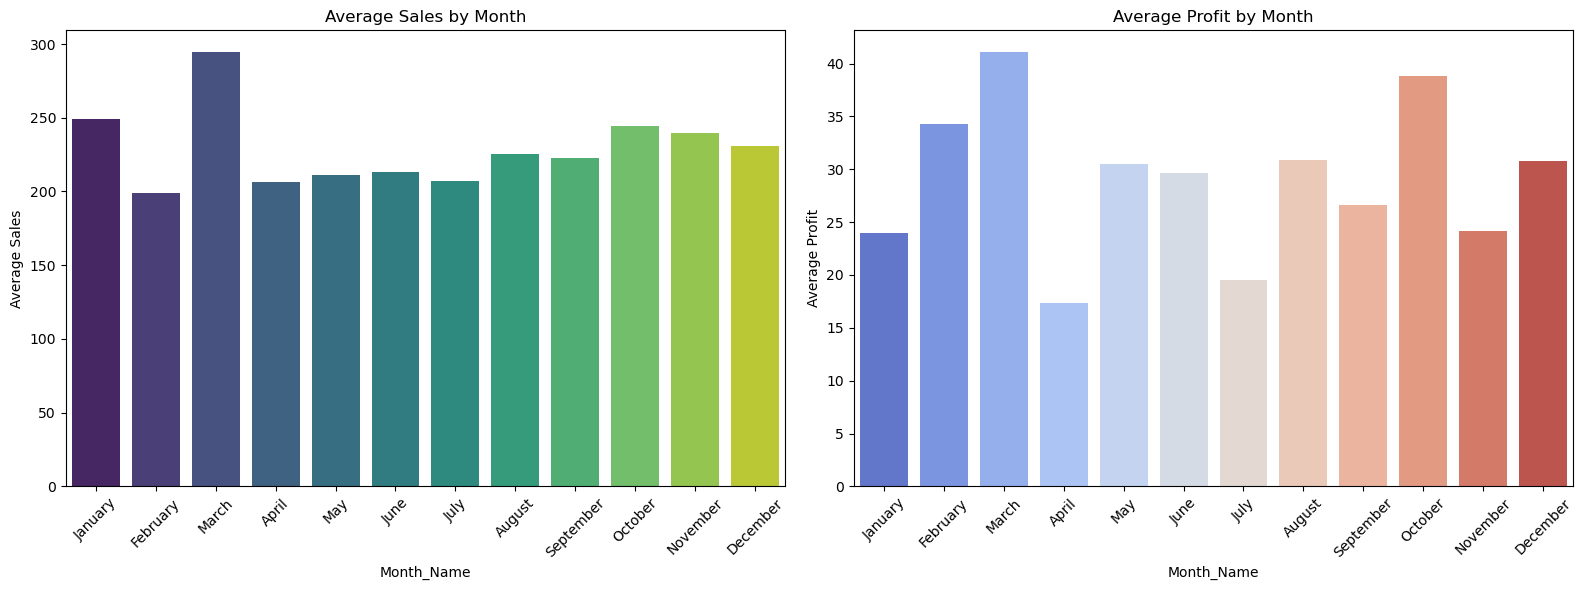

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=Seasonal_trends, x="Month_Name", y="Sales", ax=axes[0], palette="viridis")
axes[0].set_title("Average Sales by Month")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel("Average Sales")

sns.barplot(data=Seasonal_trends, x="Month_Name", y="Profit", ax=axes[1], palette="coolwarm")
axes[1].set_title("Average Profit by Month")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel("Average Profit")
plt.tight_layout()
plt.show()


March is the most significant month for both sales and profit. The company should analyze what drives this

performance and replicate it in other Months.

### **What is the Average order value(AOV) across Regions, Product categories and Customer segments?** 

This enables analysis of purchasing behaviour to develp pricing strategies and cross selling oppurtunities.

In [32]:
data["Order_Value"] = data["Sales"]/data["Quantity"]

In [33]:
Region_Aov = data.groupby("Region")["Order_Value"].mean().reset_index()
Category_Aov = data.groupby("Category")["Order_Value"].mean().reset_index()
Segment_Aov = data.groupby("Segment")["Order_Value"].mean().reset_index()

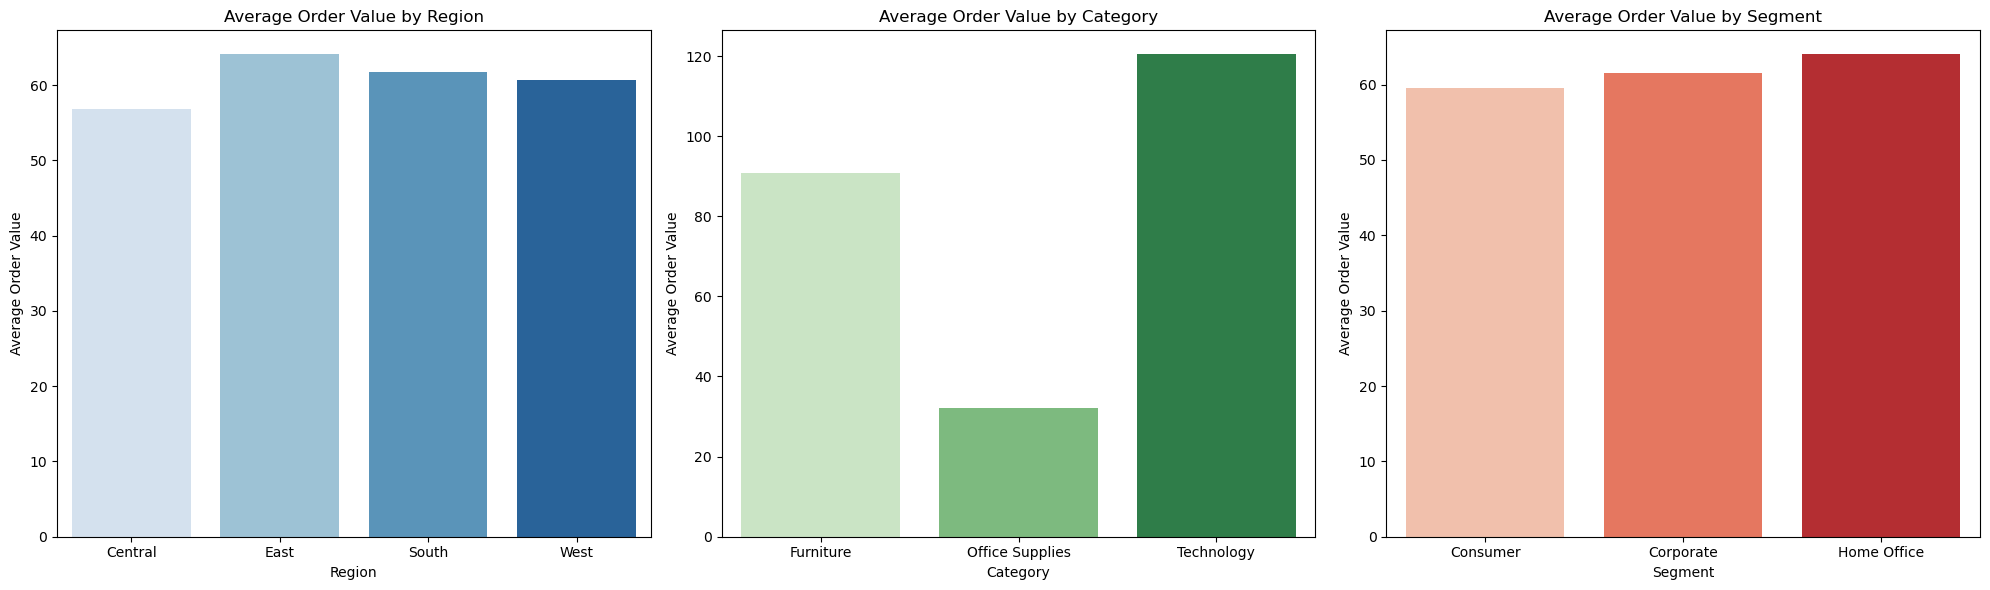

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) 
sns.barplot(data=Region_Aov, x="Region", y="Order_Value", ax=axes[0], palette="Blues")
axes[0].set_title("Average Order Value by Region") 
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Average Order Value") 

sns.barplot(data=Category_Aov, x="Category", y="Order_Value", ax=axes[1], palette="Greens")
axes[1].set_title("Average Order Value by Category")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Average Order Value") 

sns.barplot(data=Segment_Aov, x="Segment", y="Order_Value", ax=axes[2], palette="Reds")
axes[2].set_title("Average Order Value by Segment")
axes[2].set_xlabel("Segment")
axes[2].set_ylabel("Average Order Value") 

plt.tight_layout()
plt.show()

The Average order value across regions appears to be consistent, as customers tend to spend similar amounts
irrespective of their locations. Marketing campaigns can still be standardized across all regions.

Average Order value by Category has the Technology category as the highest, which may be due to high priced 
technological items compared to the office supplies and furniture. Focus on high priced technological items to
drive revenue.

Average Order value by Segment shows that all the customer segments are consistent with the Home office slightly
higher.

### **Which Shipping methods are the most cost effective and how do they impach high profitability?**
This analysis would help evaluate logistics to improve cost management and enhance customer satisfaction.

In [39]:
data["Shipping Cost"] = data["Sales"] - (data["Profit"] + data["Discount"])

In [40]:
Shipping_analysis = data.groupby("Ship Mode").agg(Total_shipping_cost=("Shipping Cost", "sum"),
                                                  avg_shipping_cost=("Shipping Cost", "mean"),
                                                  Total_profit=("Profit", "sum"),
                                                  avg_profit=("Profit", "mean"),
                                                  Total_Sales=("Sales", "sum"),
                                                  Total_discount=("Discount", "sum")).reset_index()

In [43]:
Shipping_analysis["Profit to Shipping Cost ratio"] = (Shipping_analysis["Total_profit"] / 
                                                      Shipping_analysis["Total_shipping_cost"])

In [44]:
Shipping_analysis = Shipping_analysis.sort_values("Profit to Shipping Cost ratio", ascending=False)

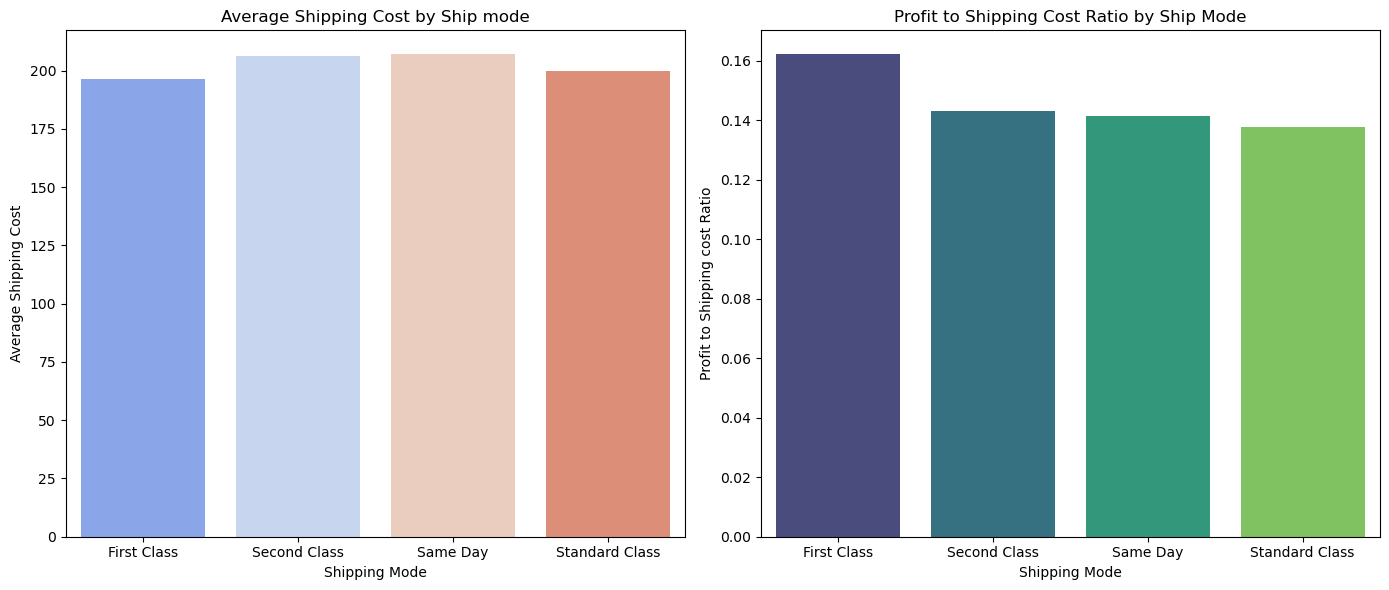

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data= Shipping_analysis, x="Ship Mode", y="avg_shipping_cost", ax=axes[0], palette="coolwarm")
axes[0].set_title("Average Shipping Cost by Ship mode")
axes[0].set_xlabel("Shipping Mode")
axes[0].set_ylabel("Average Shipping Cost") 

sns.barplot(data=Shipping_analysis, x="Ship Mode", y="Profit to Shipping Cost ratio", ax=axes[1], palette="viridis")
axes[1].set_title("Profit to Shipping Cost Ratio by Ship Mode")
axes[1].set_xlabel("Shipping Mode")
axes[1].set_ylabel("Profit to Shipping cost Ratio")
plt.tight_layout()
plt.show()

Standard Class is the cheapest shipping method as its profit to shipping ratio is lower compared to First class.
This suggest that it may not allways be the most costeffective option in terms of probability.

First class is the most cost effective shipping method since it generates the highest profitability relative to 
its shipping costs.Encouraging First class shipping might be beneficial despite its higher shipping cost. However for cost conscious customers, standard class remains a viable option. 

Also, Discounts are considered in this analysis, it is possible that shipping methods with lower profit to cost 
ratios might be dispropotionately affected by higher discounts.

### **Which factors e.g discounts, shipping regions contribute most to loss making orders?**
This is to identify areas where discounts or operational inefficiencies are eroding profits.

In [49]:
Loss_orders = data[data["Profit"] < 0]

In [50]:
region_loss_discount = Loss_orders.groupby("Region")["Discount"].mean()
region_loss_count = Loss_orders["Region"].value_counts()
category_loss_discount =Loss_orders.groupby("Category")["Discount"].mean()
correlation = Loss_orders[["Profit", "Discount", "Quantity", "Sales", "Shipping Cost"]].corr()

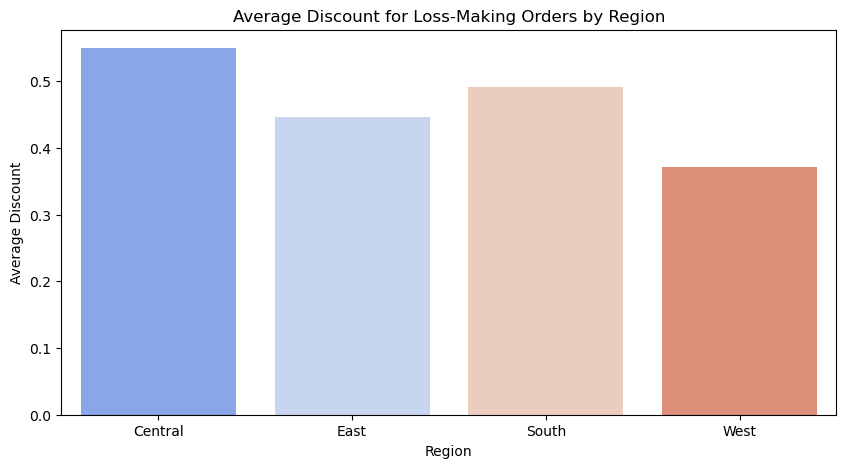

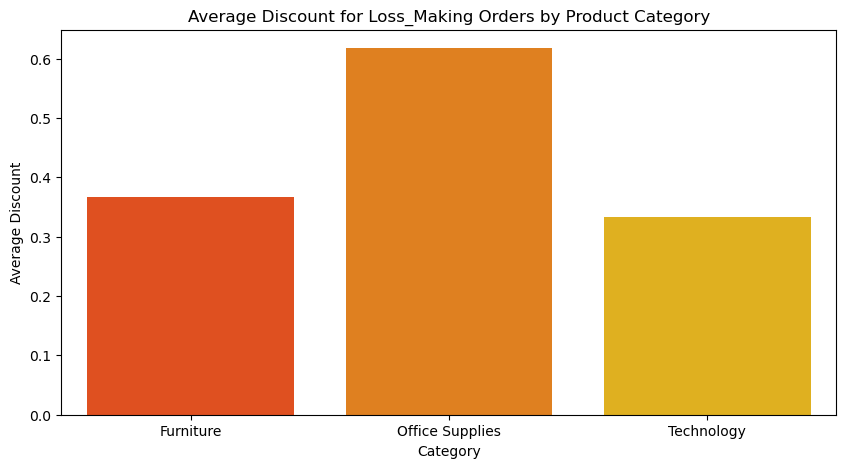

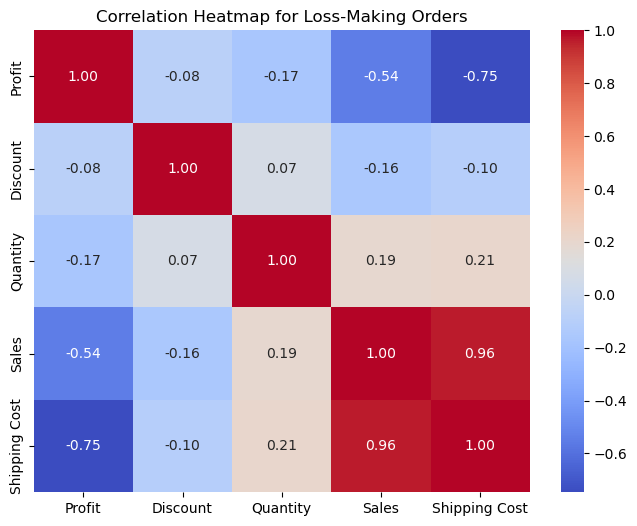

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x=region_loss_discount.index, y=region_loss_discount.values, palette="coolwarm")
plt.title("Average Discount for Loss-Making Orders by Region")
plt.xlabel("Region")
plt.ylabel("Average Discount")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=category_loss_discount.index, y=category_loss_discount.values, palette="autumn")
plt.title("Average Discount for Loss_Making Orders by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Discount")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Loss-Making Orders")
plt.show()

- There is a weak negative correlation between Profit and Discount.
- There is a moderately negative correlation between Profit and sales.
- There is a strong negative correlation between Profit annd Shipping costs.
- There is a Strong positive correlation between sales and shipping costs.